In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

path = '../../shared_data/round3/'
days = [0, 1, 2]

activity = [pd.read_csv(path + f'prices_round_3_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['product', 'day', 'timestamp'], inplace=True)
activity

bid_price_1  bid_volume_1  bid_price_2  \
product      day timestamp                                           
CHOCOLATE    0   0                 7999           111          NaN   
STRAWBERRIES 0   0                 3999           210          NaN   
ROSES        0   0                14999            72          NaN   
GIFT_BASKET  0   0                71348            19      71347.0   
                 100              71344             1      71343.0   
...                                 ...           ...          ...   
             2   999800           69537             2      69536.0   
CHOCOLATE    2   999900            7749           143          NaN   
GIFT_BASKET  2   999900           69551             1      69550.0   
STRAWBERRIES 2   999900            3984           240          NaN   
ROSES        2   999900           14411            59          NaN   

                            bid_volume_2  bid_price_3  bid_volume_3  \
product      day timestamp                                            
CHOCOLATE    0   0                   NaN          NaN           NaN   
STRAWBERRIES 0   0                   NaN          NaN           NaN   
ROSES        0   0                   NaN          NaN           NaN   
GIFT_BASKET  0   0                  24.0          NaN           NaN   
                 100                12.0      71342.0          20.0   
...                                  ...          ...           ...   
             2   999800             18.0      69535.0          24.0   
CHOCOLATE    2   999900              NaN          NaN           NaN   
GIFT_BASKET  2   999900             19.0      69549.0          20.0   
STRAWBERRIES 2   999900              NaN          NaN           NaN   
ROSES        2   999900              NaN          NaN           NaN   

                            ask_price_1  ask_volume_1  ask_price_2  \
product      day timestamp                                           
CHOCOLATE    0   0                 8001           111          NaN   
STRAWBERRIES 0   0                 4001           210          NaN   
ROSES        0   0                15001            72          NaN   
GIFT_BASKET  0   0                71362            19      71363.0   
                 100              71355             1      71356.0   
...                                 ...           ...          ...   
             2   999800           69547             2      69548.0   
CHOCOLATE    2   999900            7751           143          NaN   
GIFT_BASKET  2   999900           69561             1      69562.0   
STRAWBERRIES 2   999900            3985            92       3986.0   
ROSES        2   999900           14412            59          NaN   

                            ask_volume_2  ask_price_3  ask_volume_3  \
product      day timestamp                                            
CHOCOLATE    0   0                   NaN          NaN           NaN   
STRAWBERRIES 0   0                   NaN          NaN           NaN   
ROSES        0   0                   NaN          NaN           NaN   
GIFT_BASKET  0   0                  24.0          NaN           NaN   
                 100                12.0      71357.0          20.0   
...                                  ...          ...           ...   
             2   999800             18.0      69550.0          24.0   
CHOCOLATE    2   999900              NaN          NaN           NaN   
GIFT_BASKET  2   999900             19.0      69564.0          20.0   
STRAWBERRIES 2   999900            148.0          NaN           NaN   
ROSES        2   999900              NaN          NaN           NaN   

                            mid_price  profit_and_loss  
product      day timestamp                              
CHOCOLATE    0   0             8000.0              0.0  
STRAWBERRIES 0   0             4000.0              0.0  
ROSES        0   0            15000.0              0.0  
GIFT_BASKET  0   0            71355.0              0.0  
                

In [3]:
activity.index.get_level_values('product').unique()

Index(['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET'], dtype='object', name='product')

### CHOCOLATE

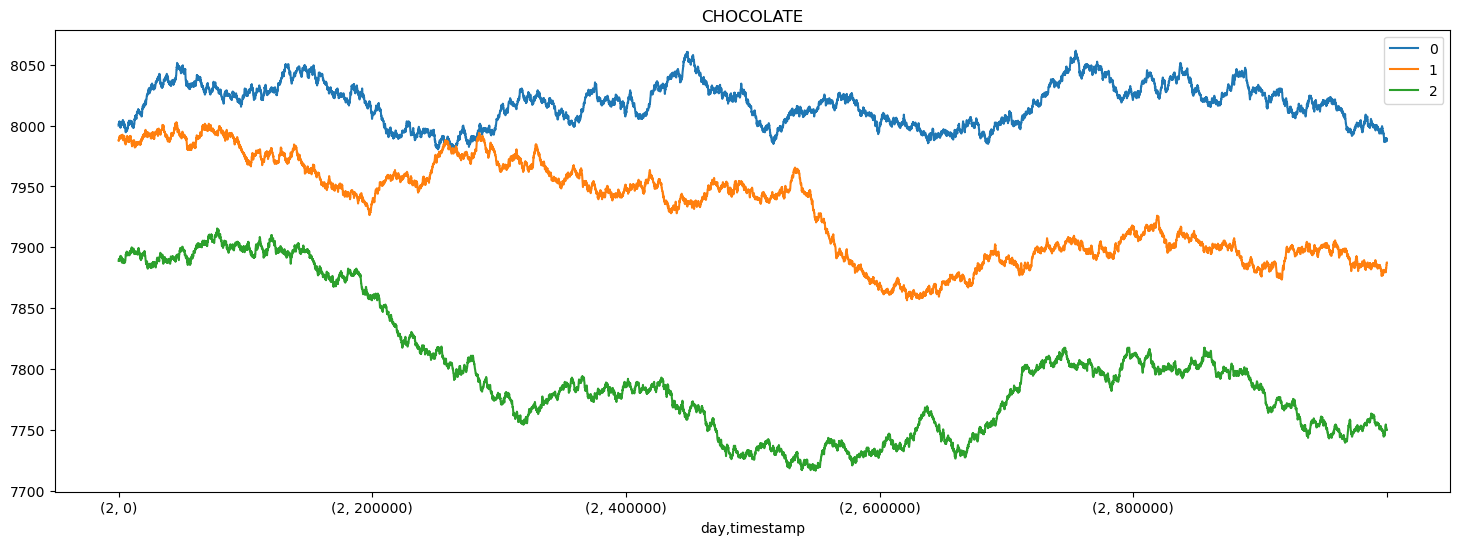

In [4]:
symbol = 'CHOCOLATE'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

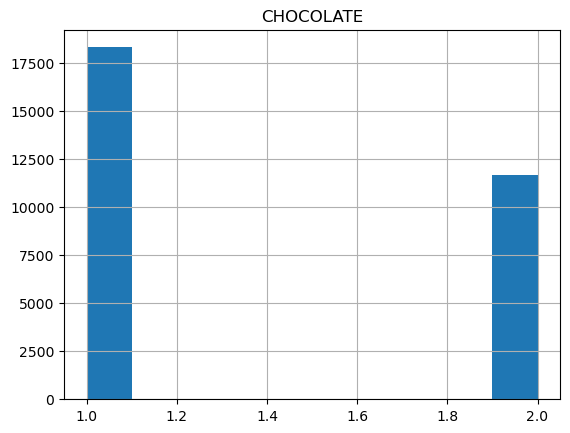

In [5]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

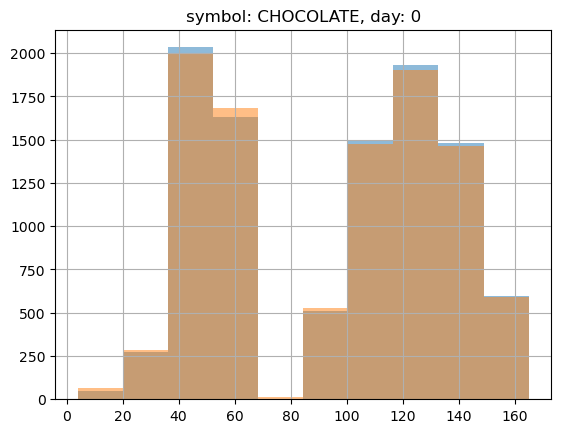

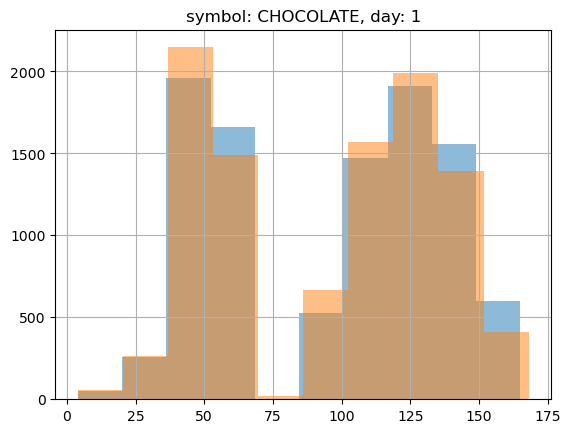

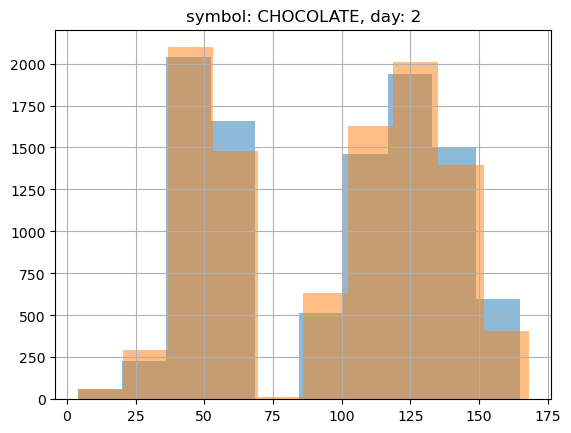

In [6]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()


### STRAWBERRIES

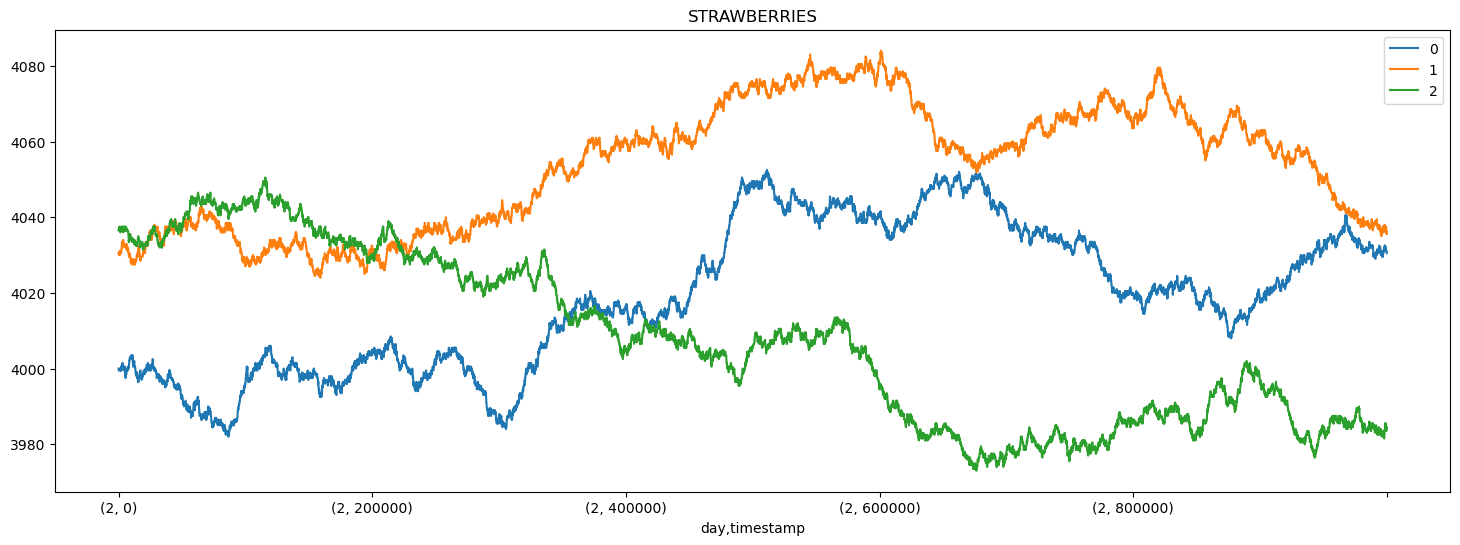

In [7]:
symbol = 'STRAWBERRIES'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

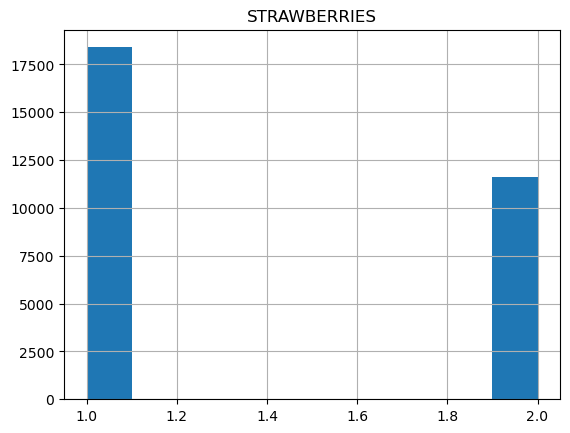

In [8]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

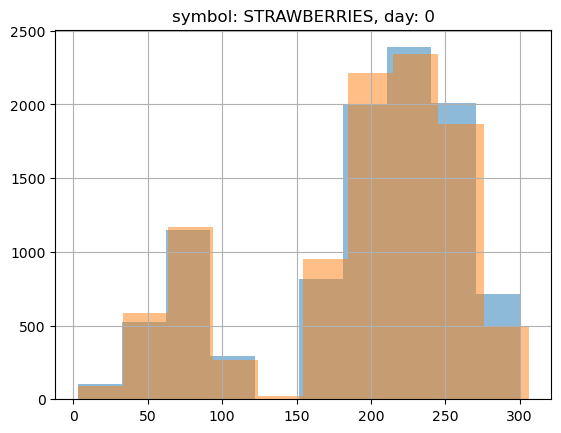

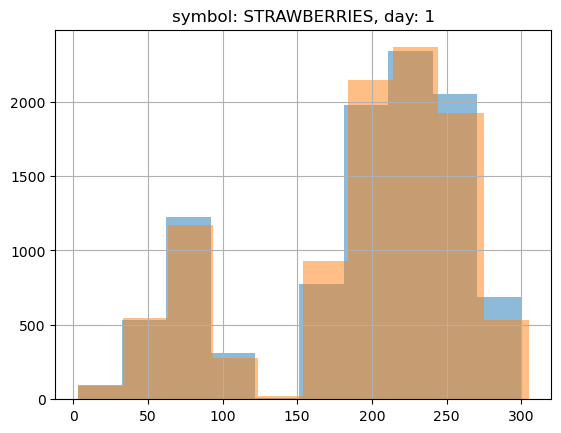

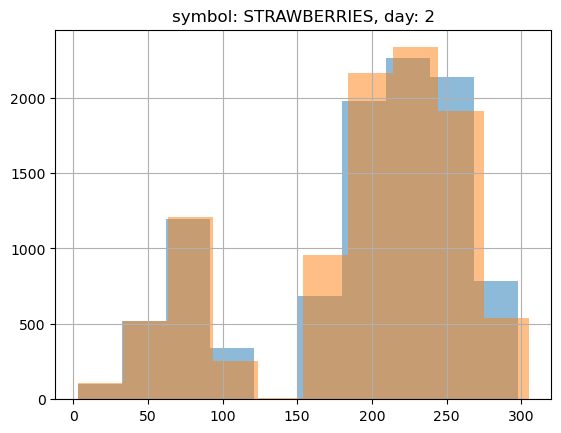

In [9]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()

### ROSES

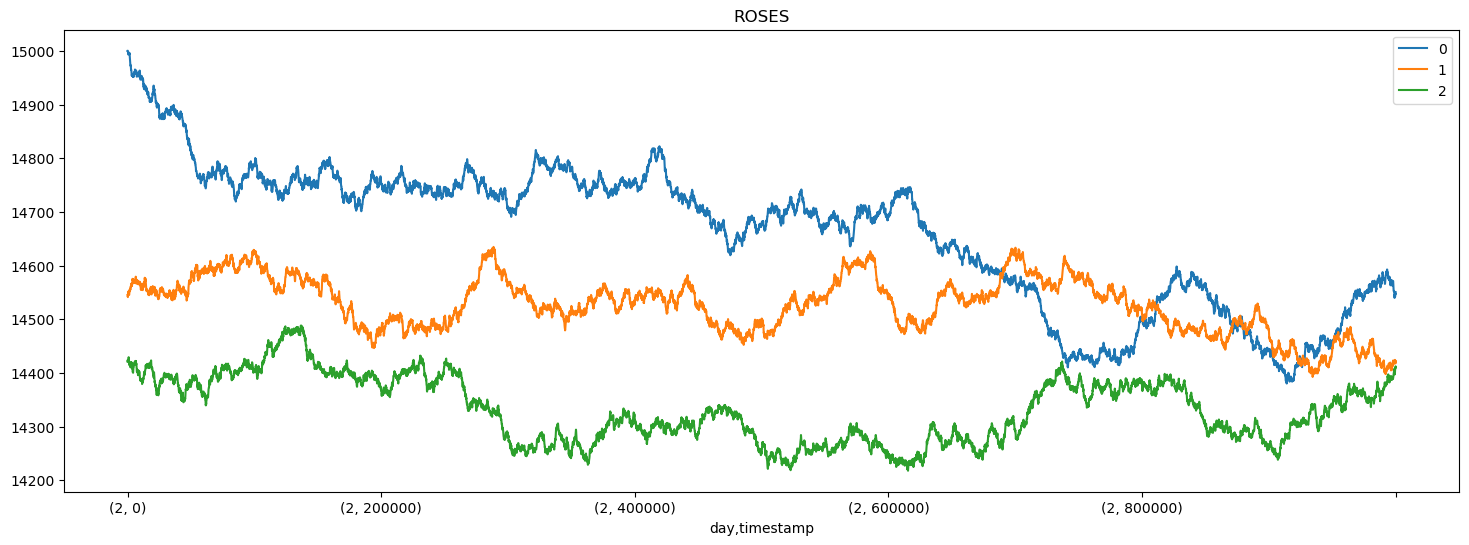

In [10]:
symbol = 'ROSES'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

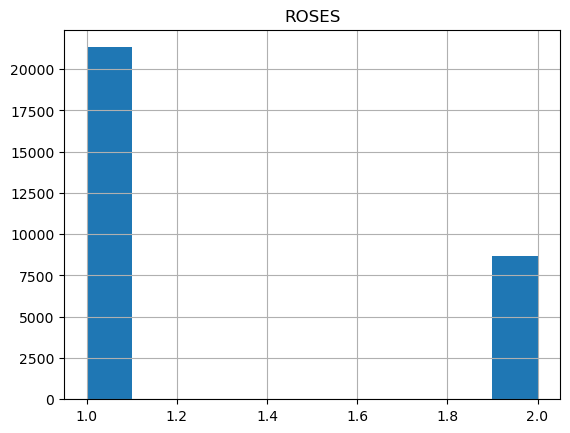

In [11]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

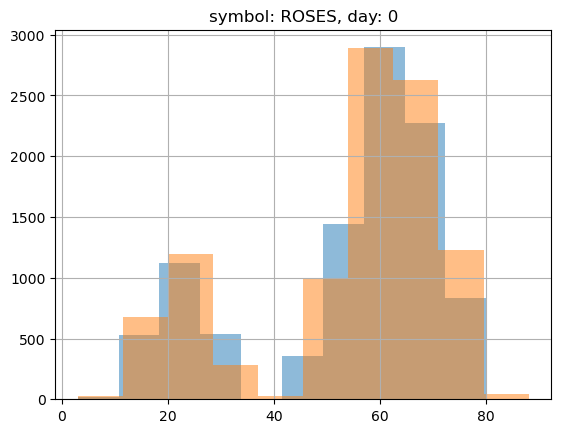

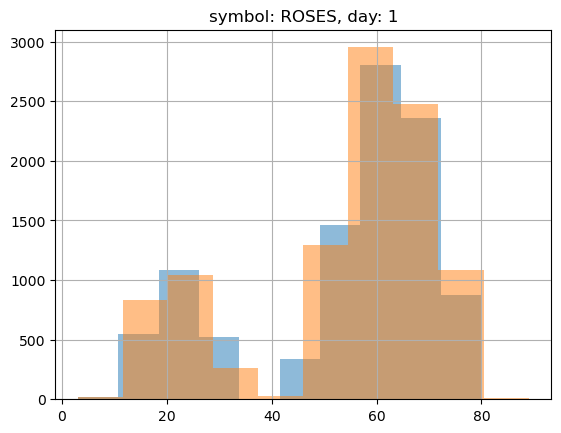

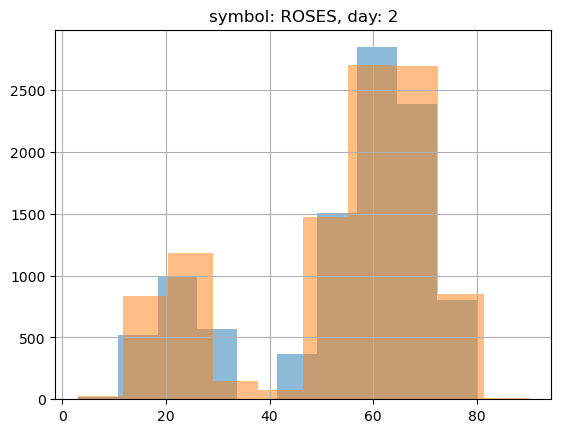

In [12]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()

### GIFT_BASKET

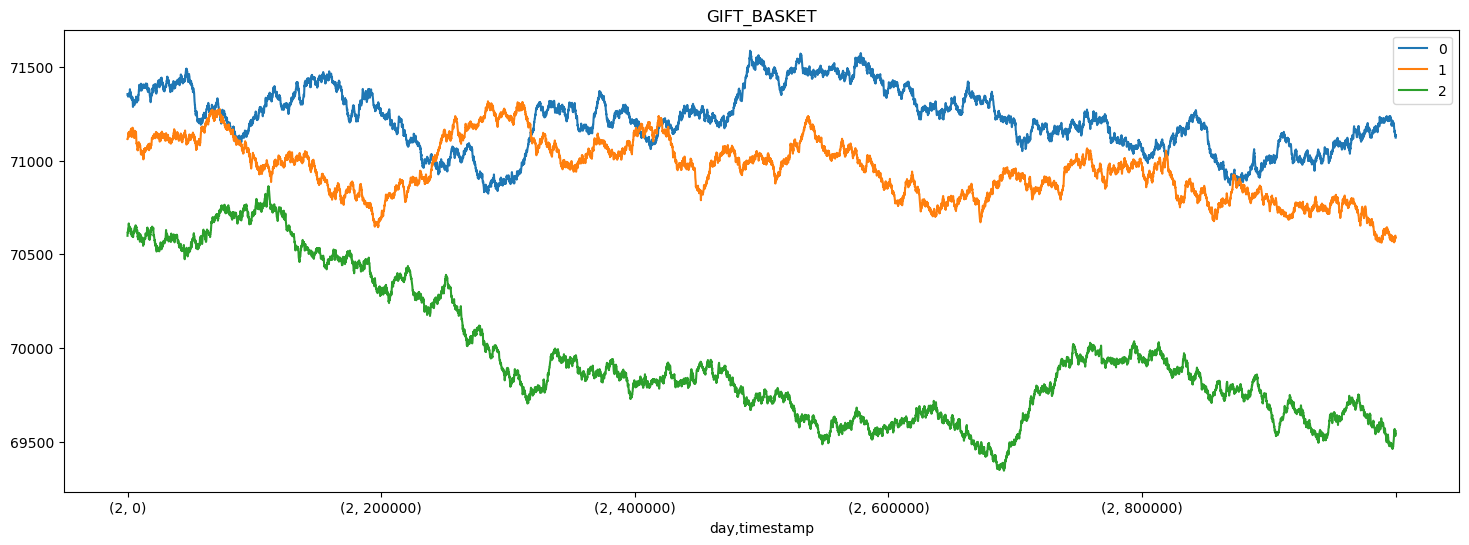

In [13]:
symbol = 'GIFT_BASKET'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

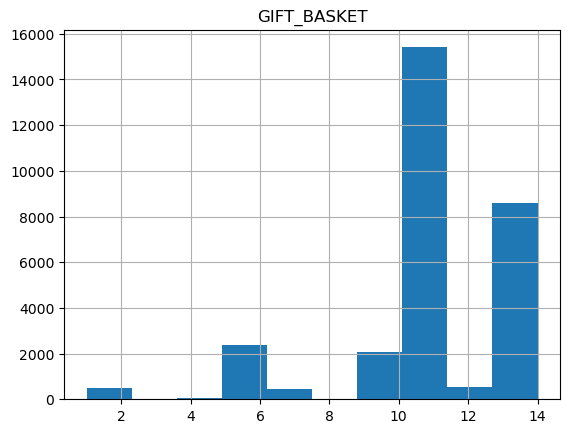

In [14]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

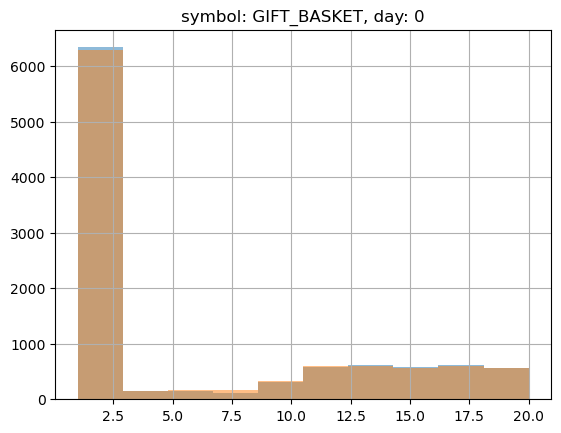

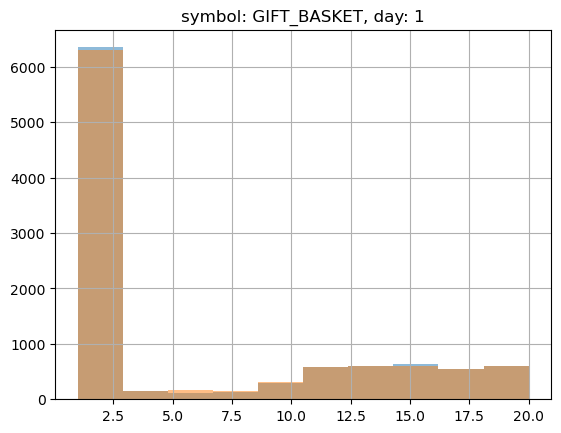

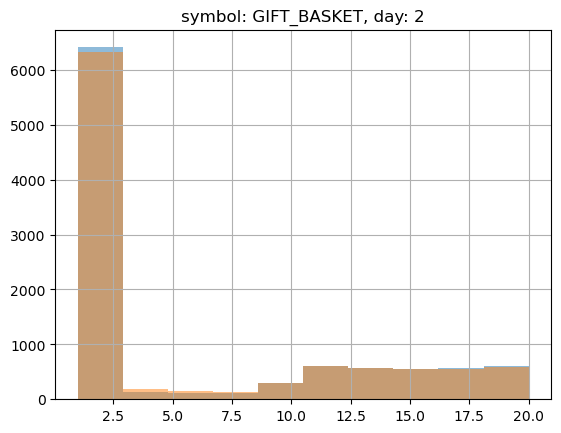

In [15]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()

Text(0.5, 1.0, 'GIFT_BASKET')

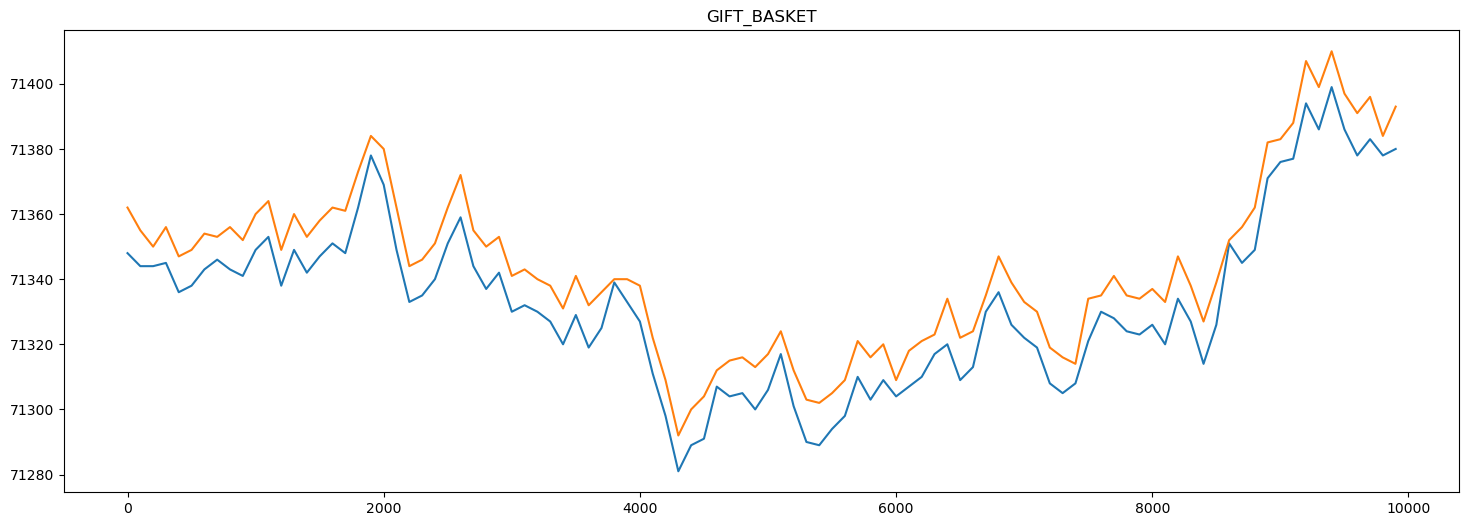

In [16]:
basket = activity.loc['GIFT_BASKET'].loc[0]

plt.figure(figsize=(18, 6))
plt.plot(basket['bid_price_1'][:100])
plt.plot(basket['ask_price_1'][:100])
plt.title('GIFT_BASKET')

### Difference

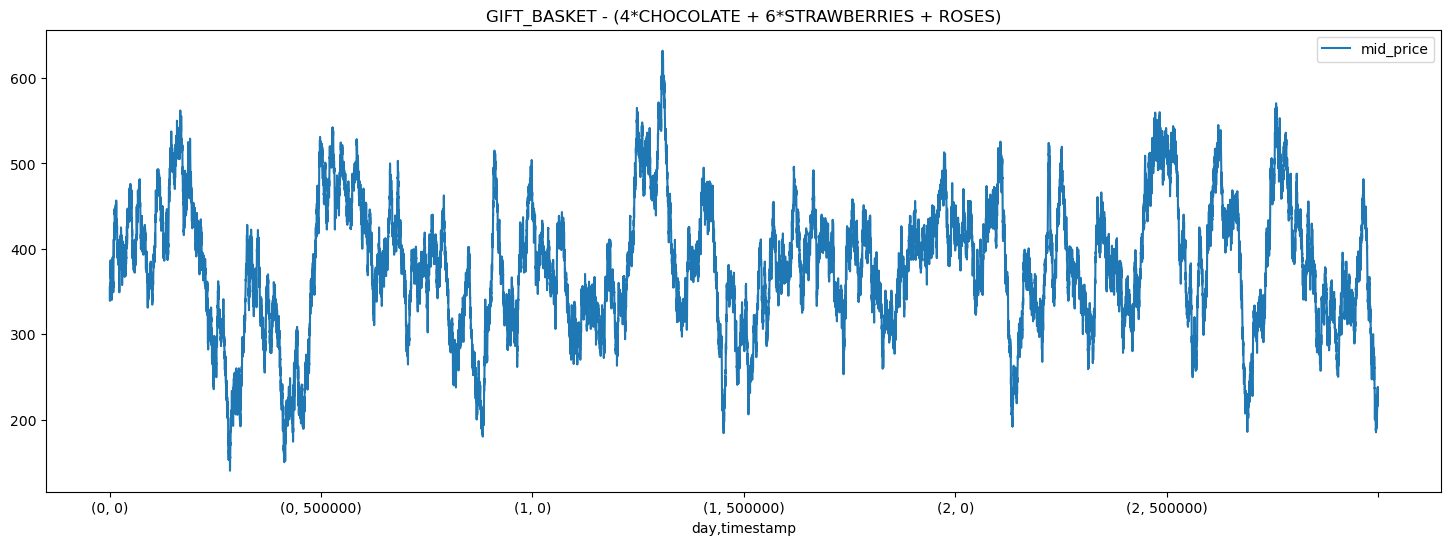

In [17]:
individual = 4*activity.loc['CHOCOLATE']['mid_price'] + 6*activity.loc['STRAWBERRIES']['mid_price'] + activity.loc['ROSES']['mid_price']
total = activity.loc['GIFT_BASKET']['mid_price']
diff = total - individual

plt.figure(figsize=(18, 6))
diff.plot(legend=True)
plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
plt.show()

In [18]:
diff.describe()

count    30000.000000
mean       379.490483
std         76.424382
min        140.000000
25%        329.000000
50%        381.000000
75%        430.000000
max        632.000000
Name: mid_price, dtype: float64

In [19]:
individual_shift = individual + 379.5

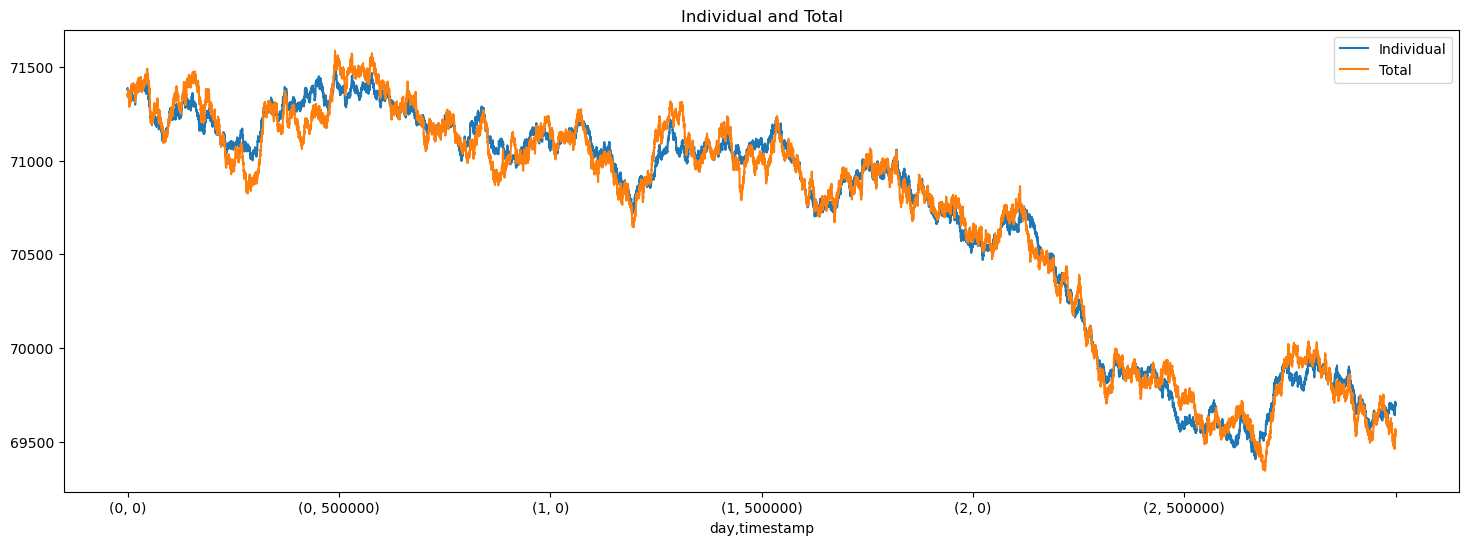

In [20]:
plt.figure(figsize=(18, 6))
individual_shift.plot(legend=True, label='Individual')
total.plot(legend=True, label='Total')
plt.title('Individual and Total')   
plt.show()

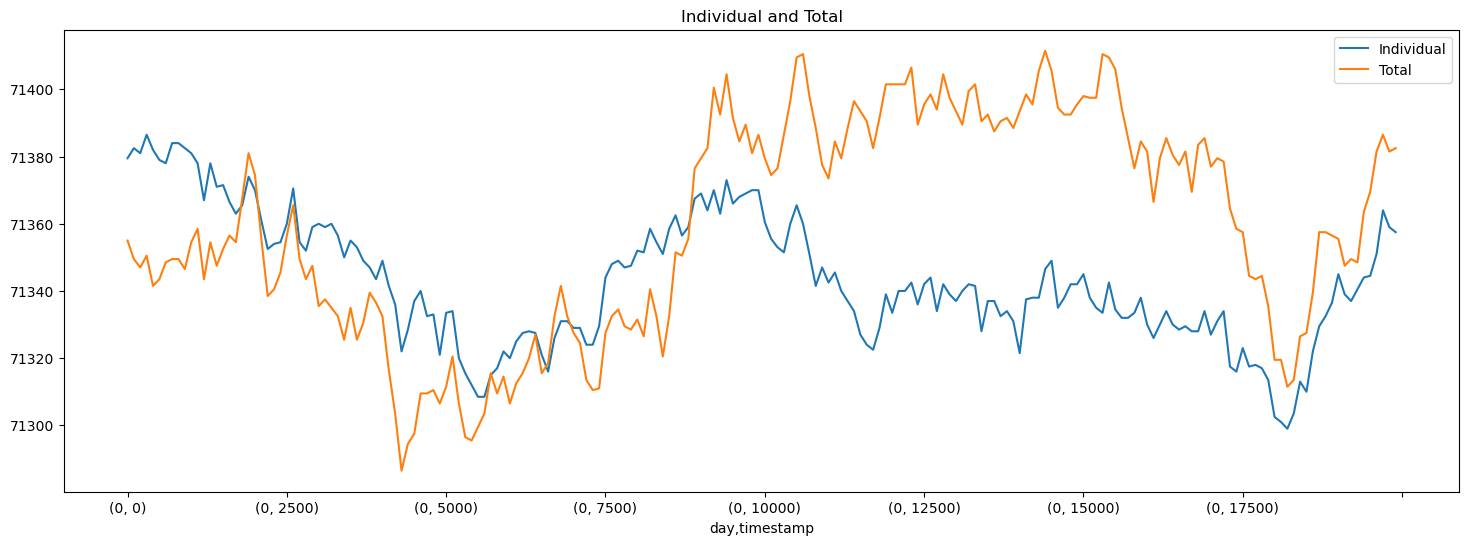

In [21]:
plt.figure(figsize=(18, 6))
individual_shift[:200].plot(legend=True, label='Individual')
total[:200].plot(legend=True, label='Total')
plt.title('Individual and Total')
plt.show()

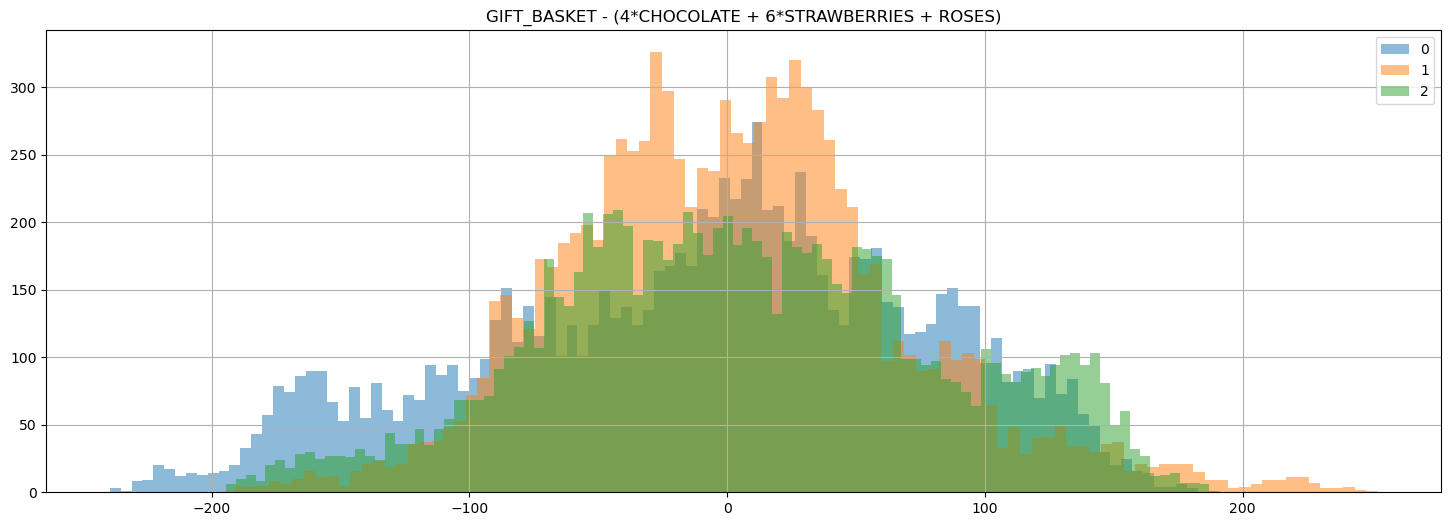

In [22]:
diff_shift = diff - 379.5

diff_shift.groupby('day').hist(bins=100, alpha=0.5, figsize=(18, 6))
plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
plt.legend(days)
plt.show()

In [23]:
diff_shift.groupby('day').describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
0,10000.0,-9.26940,85.293178,-239.5,-69.5,0.0,53.5,182.5
1,10000.0,2.44180,65.750569,-195.5,-42.0,0.5,39.5,252.5
2,10000.0,6.79905,76.072587,-194.5,-47.5,3.5,59.0,191.0


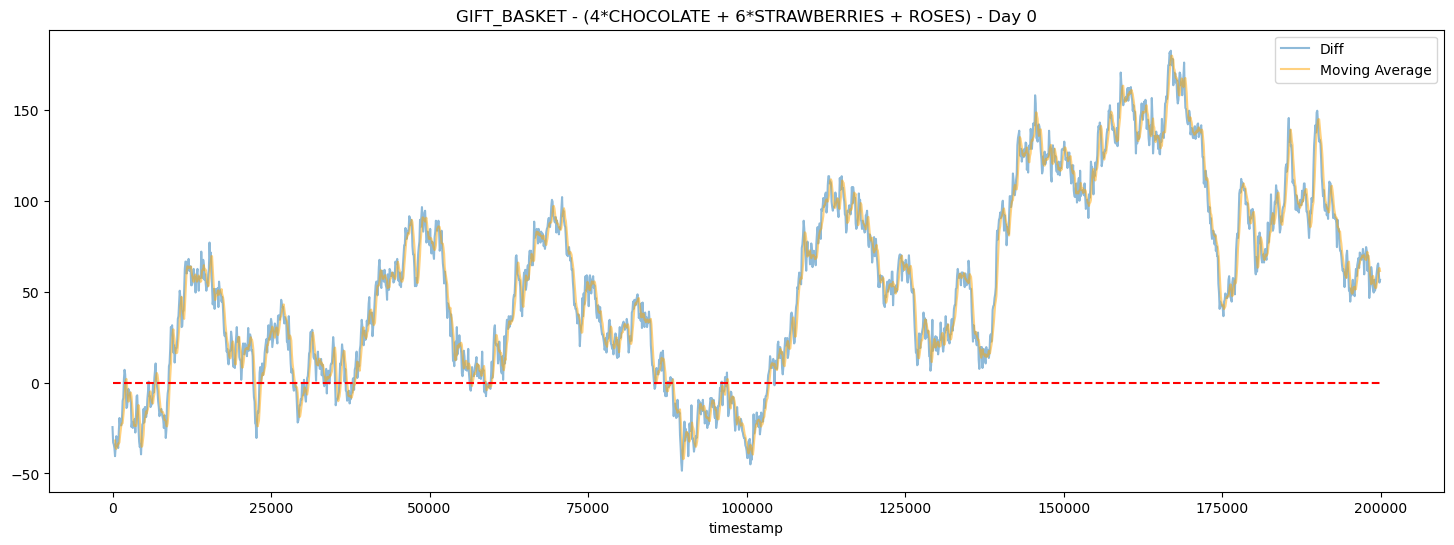

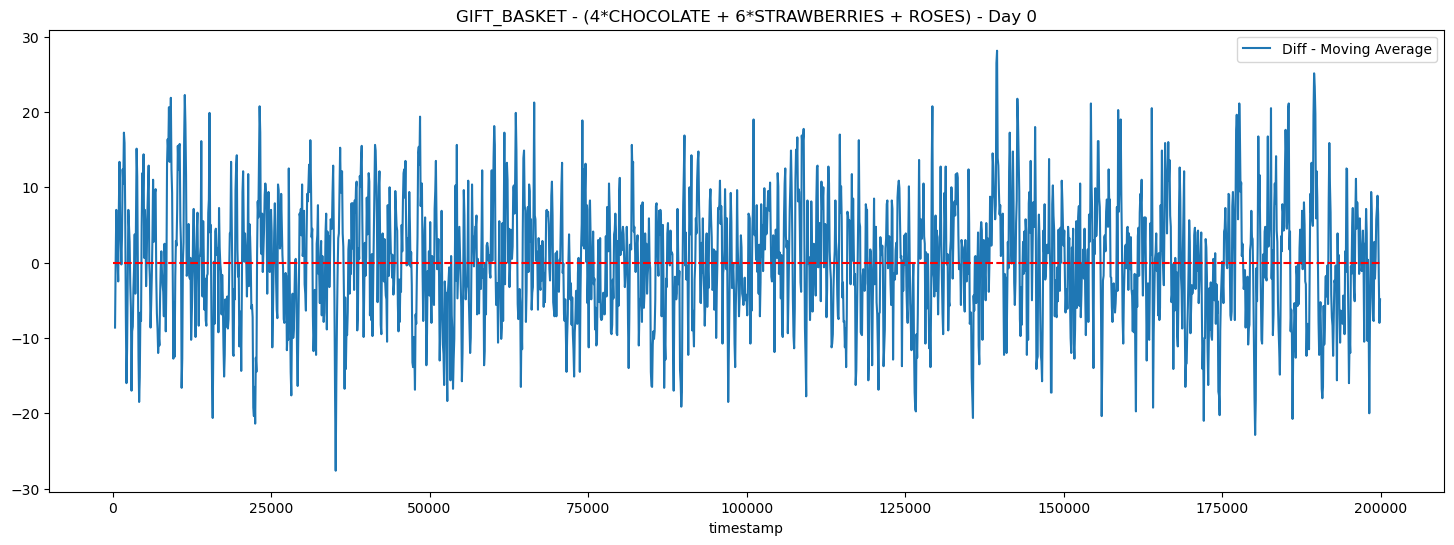

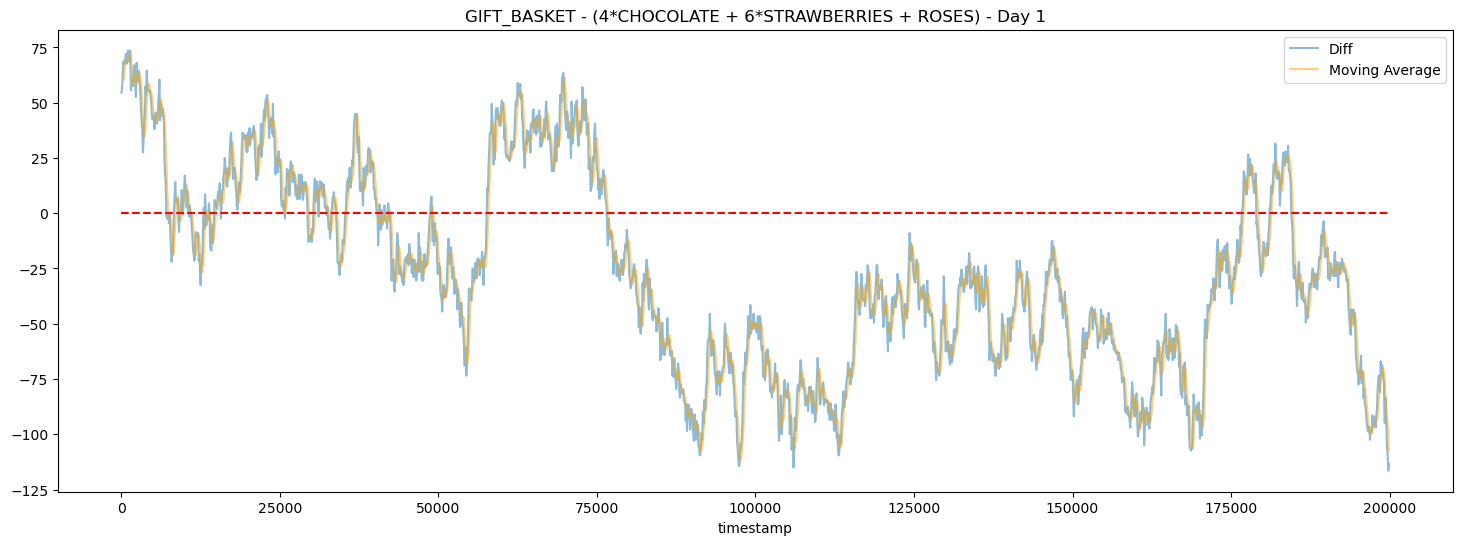

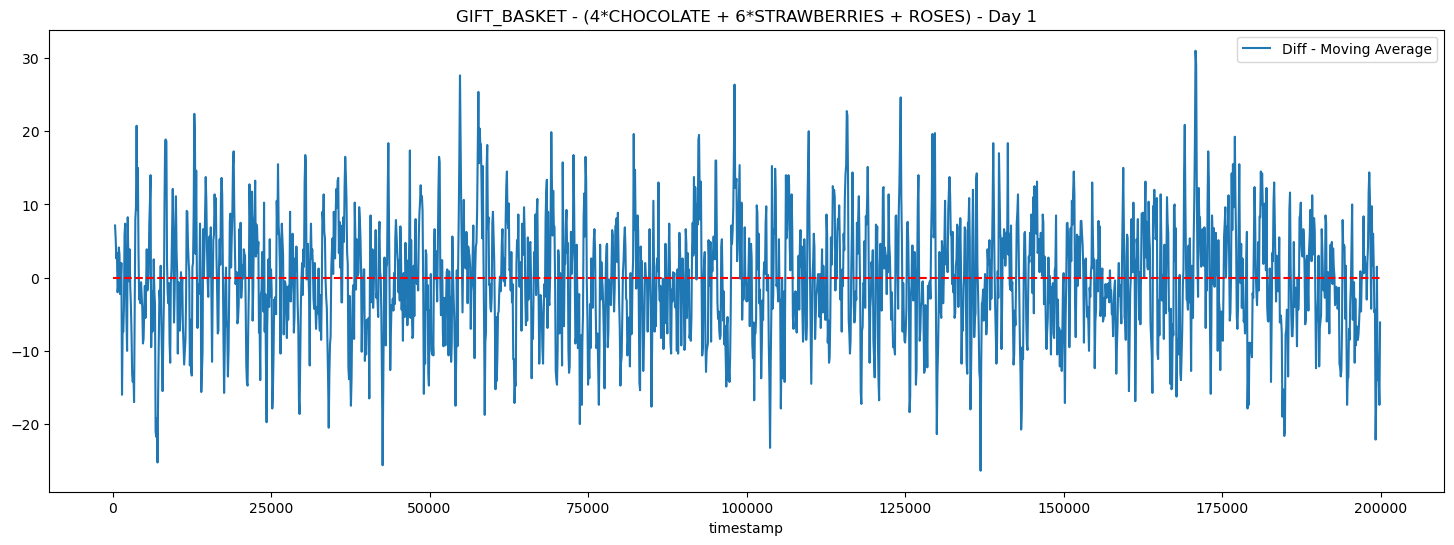

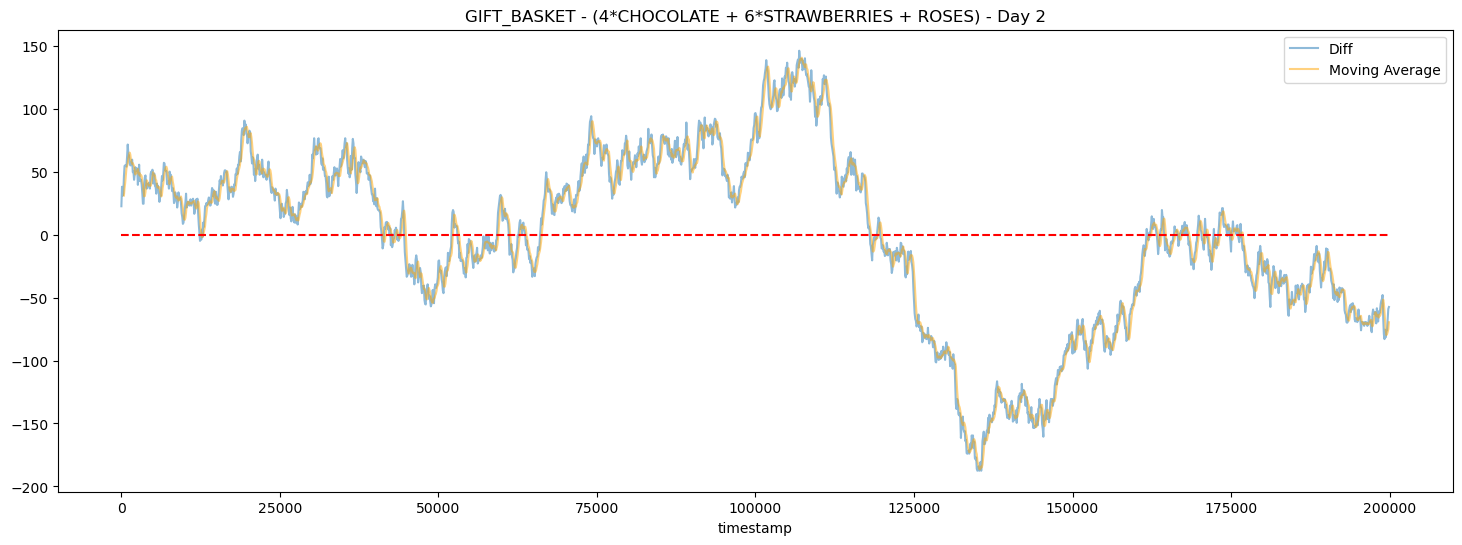

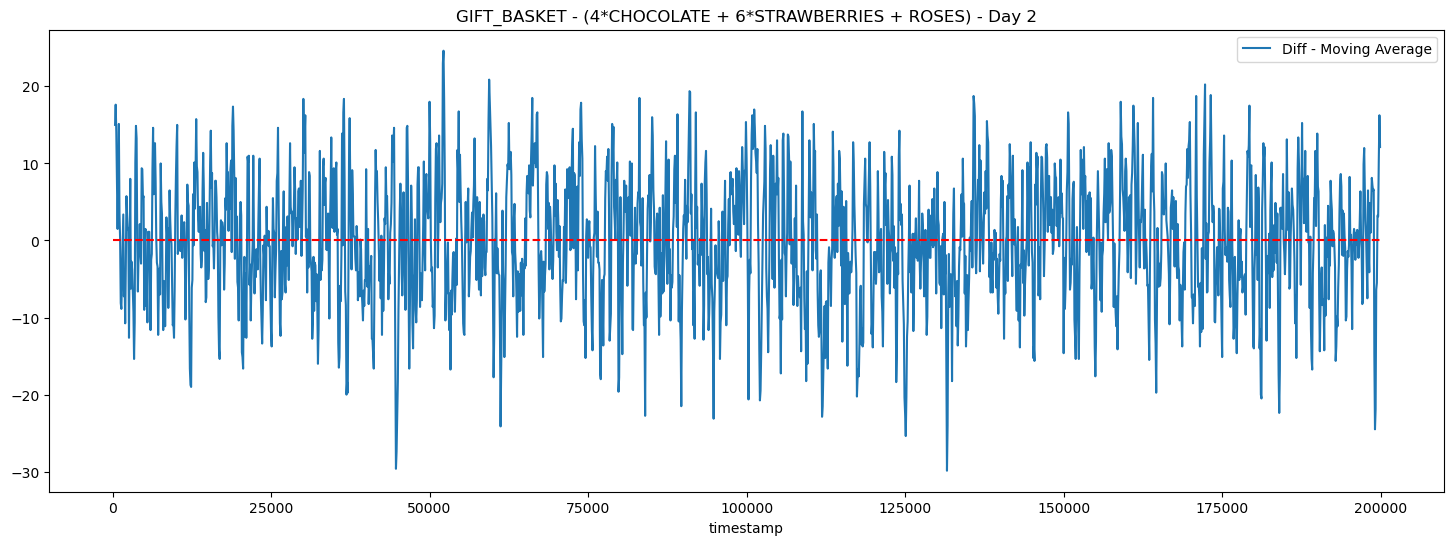

In [24]:
window_size = 4
sample = 2000

for d in days:
    avg = diff_shift.loc[d].rolling(window_size).mean().shift(1)

    plt.figure(figsize=(18, 6))
    diff_shift.loc[d][:sample].plot(legend=True, label='Diff', alpha=0.5)
    avg[:sample].plot(legend=True, label='Moving Average', color='orange', alpha=0.5)
    plt.hlines(0, 0, diff_shift.loc[d].index[sample], color='r', linestyle='--')
    plt.title(f'GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES) - Day {d}')
    plt.show()

    plt.figure(figsize=(18, 6))
    (diff_shift - avg).loc[d][:sample].plot(legend=True, label='Diff - Moving Average')
    plt.hlines(0, 0, diff_shift.loc[d].index[sample], color='r', linestyle='--')
    plt.title(f'GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES) - Day {d}')
    plt.show()

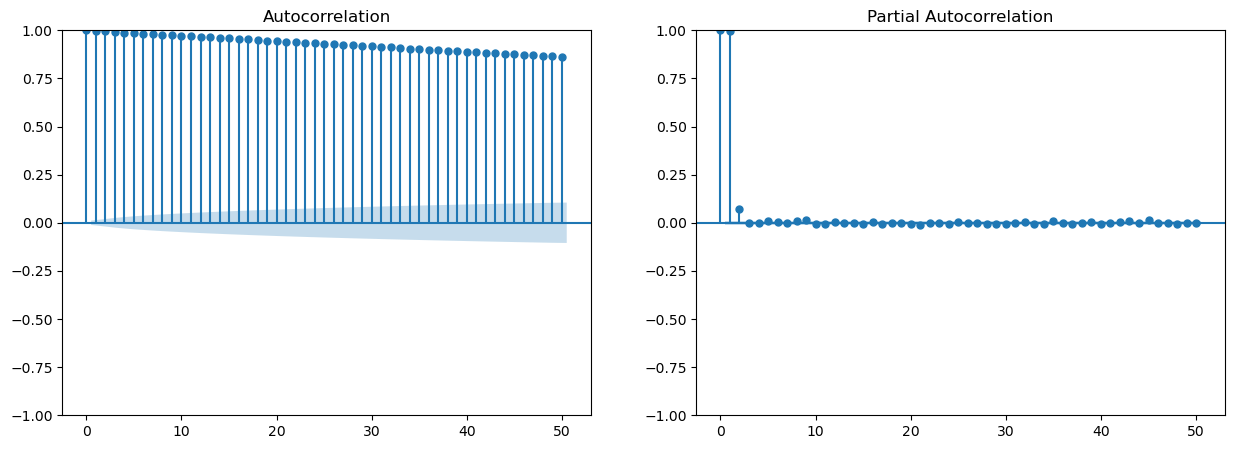

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(diff_shift, lags=50, ax=ax[0])
plot_pacf(diff_shift, lags=50, ax=ax[1])
plt.show()

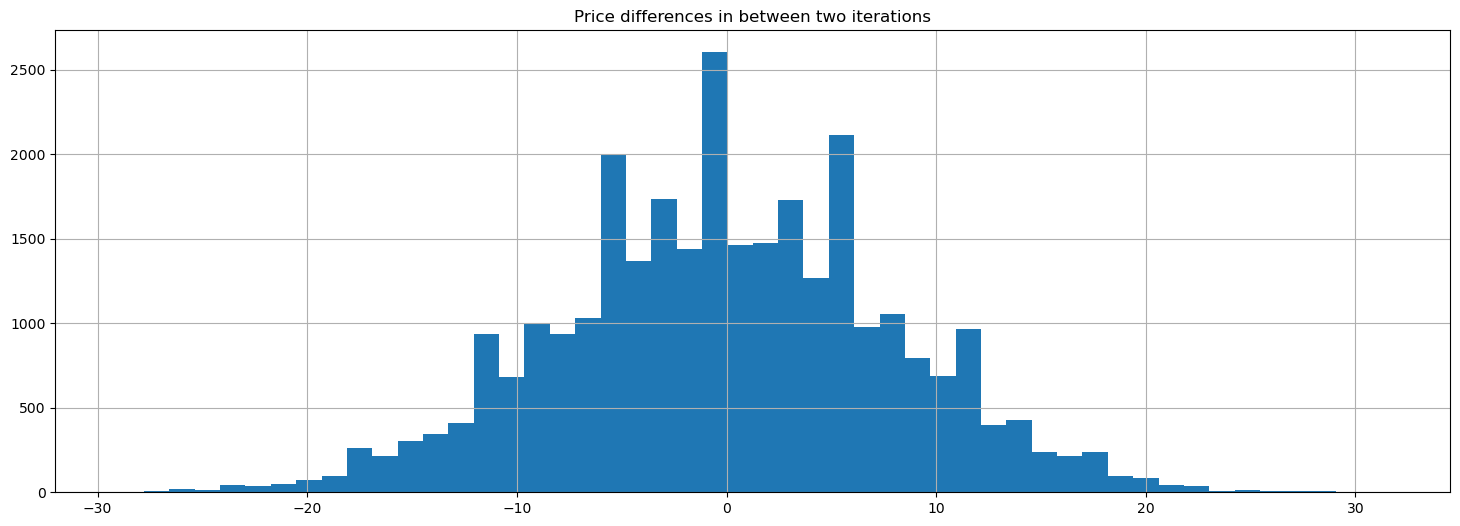

In [26]:
total.diff().hist(bins=50, figsize=(18, 6))
plt.title('Price differences in between two iterations')
plt.show()

## Average

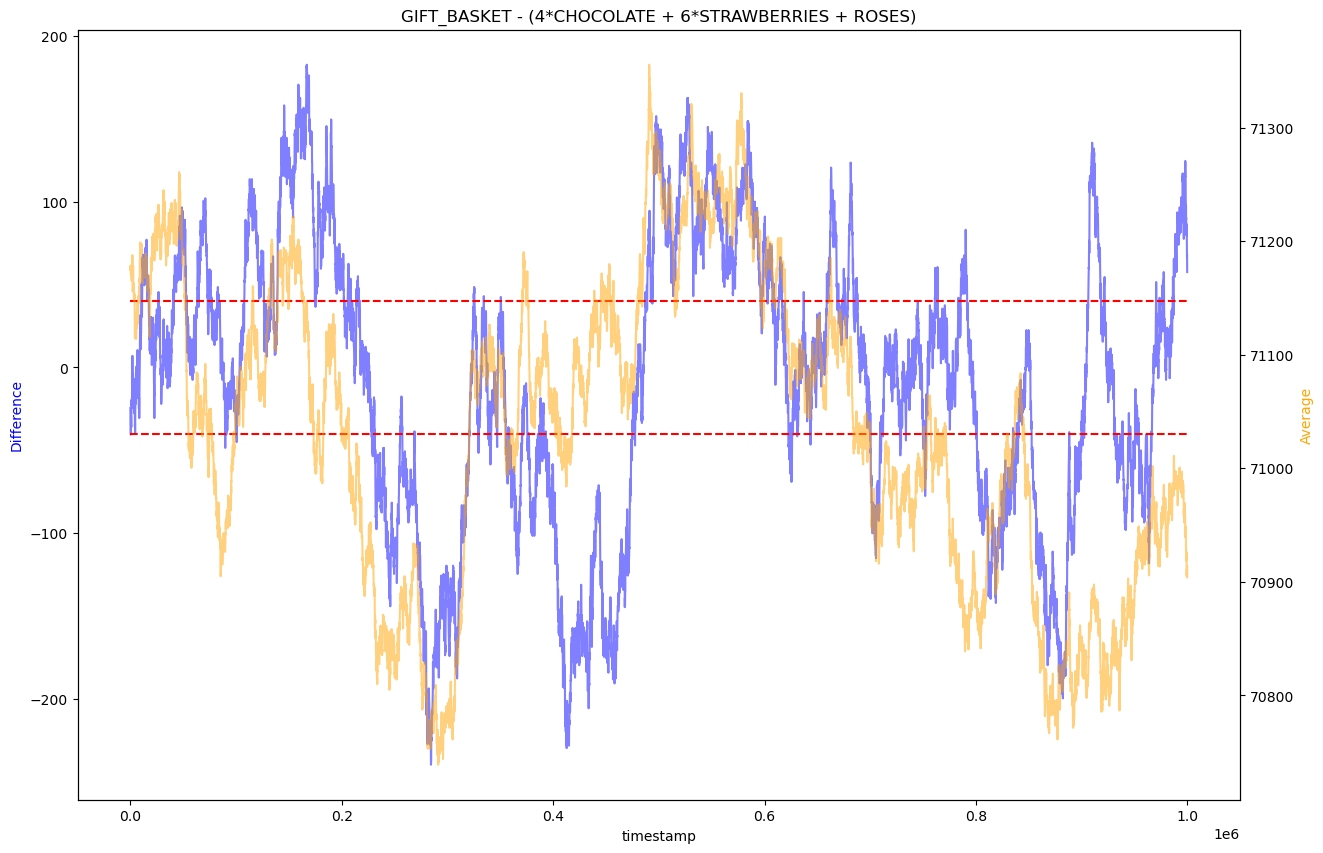

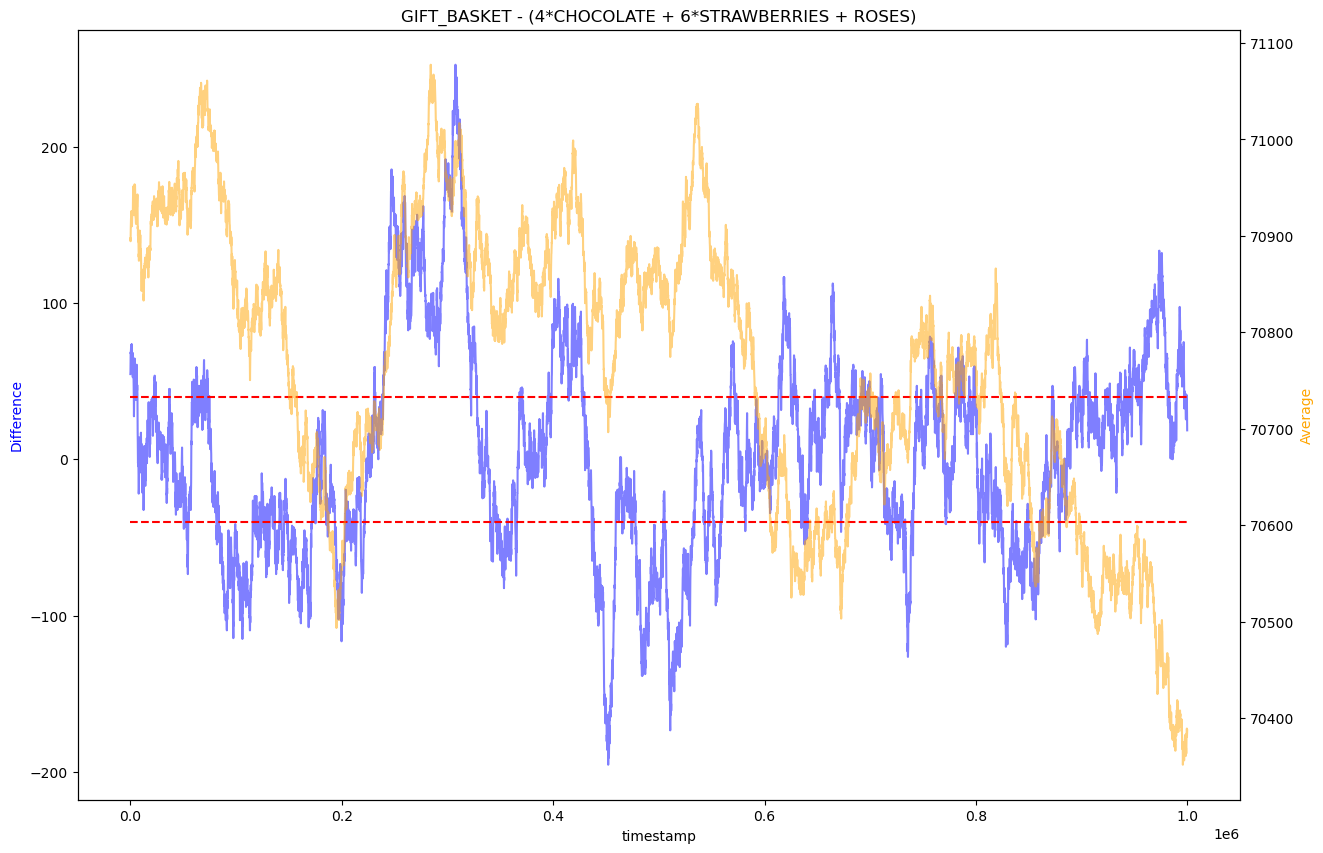

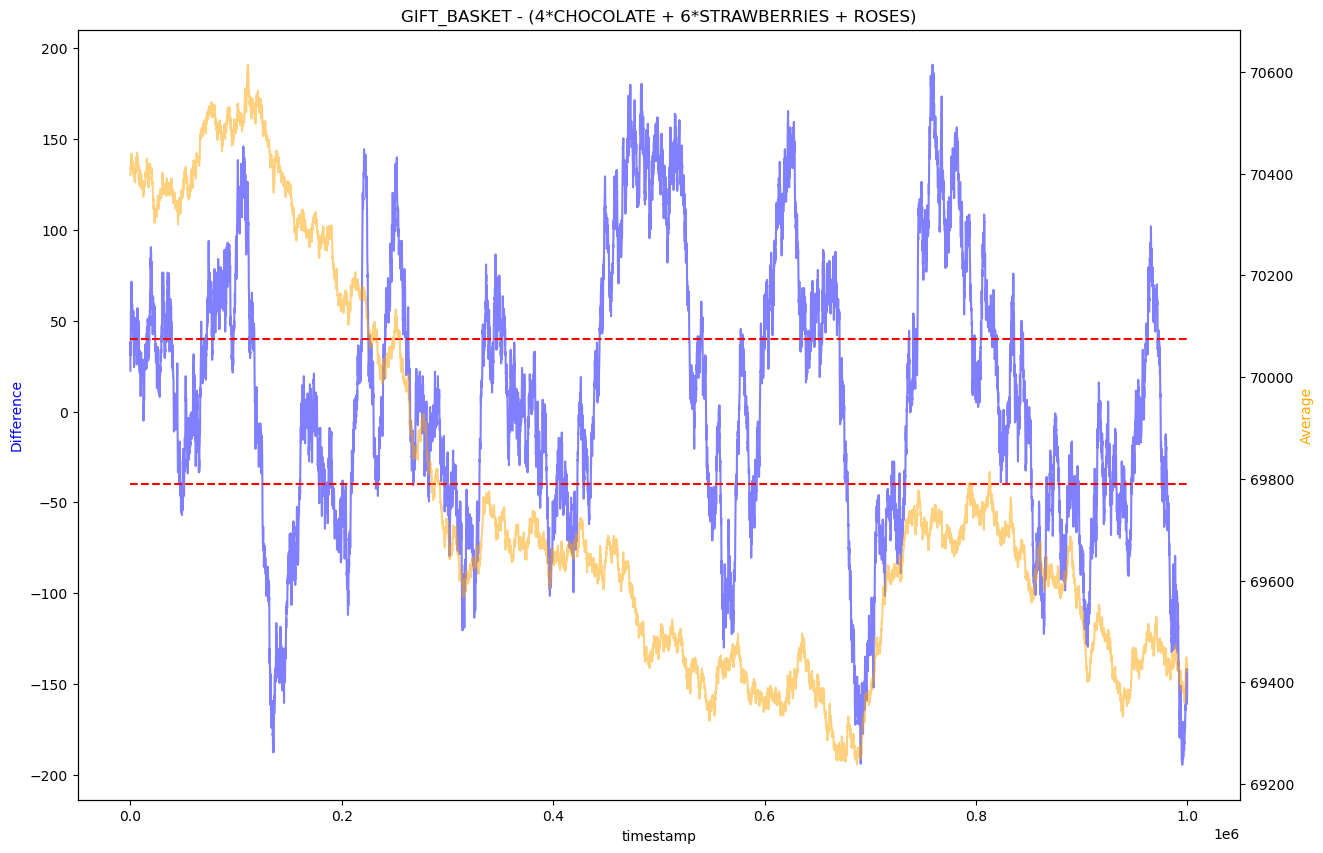

In [27]:
avg = (individual + total) / 2

for d in days:

    fig, ax = plt.subplots(figsize=(15, 10))
    ax2 = ax.twinx()
    assert isinstance(ax, plt.Axes)
    assert isinstance(ax2, plt.Axes)
    
    diff_shift.loc[d].plot(ax=ax, color='blue', alpha=0.5)
    ax.hlines(40, diff_shift.loc[d].index[0], diff_shift.loc[d].index[-1], color='r', linestyle='--')
    ax.hlines(-40, diff_shift.loc[d].index[0], diff_shift.loc[d].index[-1], color='r', linestyle='--')
    ax.set_ylabel('Difference', color='blue')
    avg.loc[d].plot(ax=ax2, color='orange', alpha=0.5)
    ax2.set_ylabel('Average', color='orange')
    plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
    plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

for d in days:
    result = adfuller(diff_shift.loc[d])
    print(f'ADF Statistic for day {d}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print()

ADF Statistic for day 0: -3.339885122043909
p-value: 0.01318706207337833
Critical Values:
	1%: -3.431004228818807
	5%: -2.8618291302145686
	10%: -2.566923898875394

ADF Statistic for day 1: -4.392222751808027
p-value: 0.00030638252085184083
Critical Values:
	1%: -3.431004228818807
	5%: -2.8618291302145686
	10%: -2.566923898875394

ADF Statistic for day 2: -3.6372588919777806
p-value: 0.005087392913502122
Critical Values:
	1%: -3.431004228818807
	5%: -2.8618291302145686
	10%: -2.566923898875394



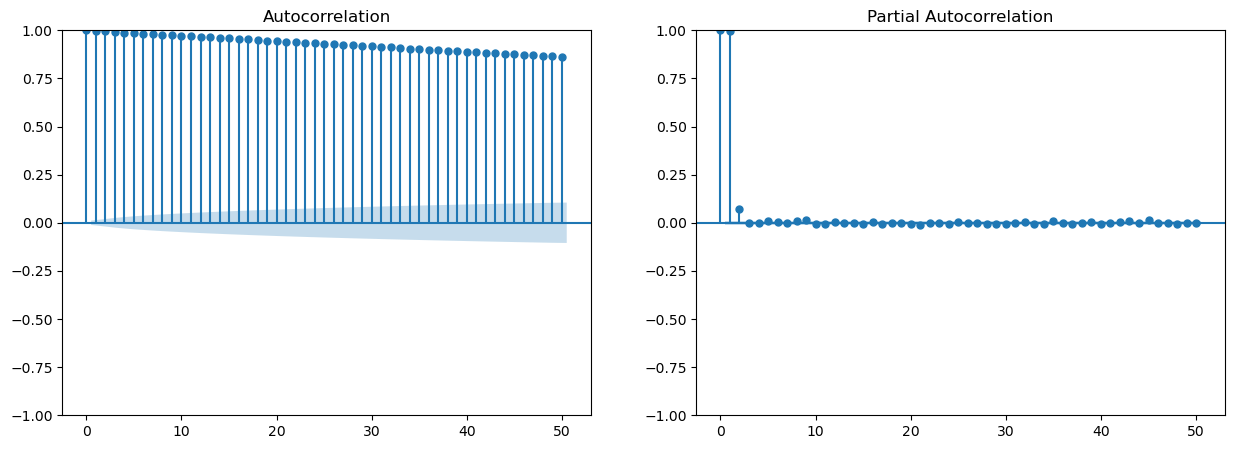

In [29]:
# plot the autocorrelation of the differences
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(diff_shift, lags=50, ax=ax[0])
plot_pacf(diff_shift, lags=50, ax=ax[1])
plt.show()

## Momentum-based trading

In [ ]:
window_size = 10

diff.rolling(window_size).mean().plot(legend=True, figsize=(18, 6))
plt.show()